In [59]:
%matplotlib inline
import pandas
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import math
from geopy.distance import vincenty
rcParams['figure.figsize'] = 15, 10

In [60]:
data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])
#new_data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje.csv",
#					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
#								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
#                      parse_dates = ['Time'])
#data = [data, new_data]

In [61]:
data.head(200)

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,25,21.034733,25,2017-05-21 15:38:04,52.258099,True,5
1,RUNNING,20,20.897888,20,2017-05-21 15:38:00,52.260101,True,6
2,RUNNING,4,21.022173,4,2017-05-21 15:38:27,52.207378,True,2
3,RUNNING,17,20.997881,"17,18",2017-05-21 15:38:00,52.254669,True,5
4,RUNNING,25,20.993887,25,2017-05-21 15:38:08,52.226051,True,1
5,RUNNING,28,21.028883,28,2017-05-21 15:38:30,52.256512,True,6
6,RUNNING,9,20.946791,9,2017-05-21 15:38:30,52.178928,True,38
7,RUNNING,22,20.962631,22,2017-05-21 15:38:30,52.266991,True,7
8,RUNNING,9,21.039267,9,2017-05-21 15:38:10,52.235615,True,32
9,RUNNING,15,20.980597,15,2017-05-21 15:38:27,52.275333,True,4


In [62]:
data.tail(15)

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
3086653,RUNNING,3,21.044020,3,2017-05-27 13:43:32,52.248993,True,4
3086654,RUNNING,26,20.916243,26,2017-05-27 13:43:33,52.225891,True,5
3086655,RUNNING,3,21.118853,3,2017-05-27 13:43:04,52.238129,True,2
3086656,RUNNING,3,21.024530,3,2017-05-27 13:43:31,52.296951,True,7
3086657,RUNNING,3,21.038547,3,2017-05-27 13:43:09,52.264545,True,8
3086658,RUNNING,9,21.012318,9,2017-05-27 13:43:31,52.229969,True,32
3086659,RUNNING,9,20.943748,9,2017-05-27 13:43:29,52.175838,True,8
3086660,RUNNING,7,20.943928,7,2017-05-27 13:43:04,52.175953,True,7
3086661,RUNNING,22,20.981201,22,2017-05-27 13:43:22,52.252972,True,9
3086662,RUNNING,22,20.945314,22,2017-05-27 13:43:33,52.271637,True,8


### Status

In [63]:
len(data[data['Status'] != 'RUNNING'])

0

Kolumna Status przyjmuje tylko jedną wartość, więc można się jej pozbyć.

In [64]:
data = data.drop('Status', 1)

### FirstLine

In [65]:
data.groupby('FirstLine', sort=True).size()

FirstLine
1     162787
2      84091
3     106001
4     126472
6     125666
7     109804
9     273449
10    138745
11    109677
13     83462
14     69135
15    127592
17    138964
18     67736
20    108955
22    133579
23    103876
24    149381
25    113673
26    144376
27     62003
28    111483
31     62368
33    181230
35    147967
44     44196
dtype: int64

* Po porównaniu zebranych danych z rozkładem jazdy okazało się, że istnieją dane dla wszystkich funkcjonujących obecnie tramwajów poza linią 77 (linia uzupełniająca).

* Najmniej obserwacji znaleziono dla linii 44 - jest to linia okresowa, co oznacza, że kursuje tylko w dni nauki szkolnej i tylko w określonych porach (5-9 i 14-18).

* Najwięcej obserwacji znaleziono dla linii 9 - jeździ ona bardzo często (w godzinach 8-19 nawet co kilka minut) i kursuje prawie przez całą dobę (zaczyna o 4.10, a kończy o 1.20)

### Lat i Lon

#### Usunięcie danych spoza Warszawy

In [66]:
minLat = 52.09
maxLat = 52.36
minLon = 20.85
maxLon = 21.27

In [67]:
oldLen = len(data)

In [68]:
data = data[(data['Lat'] < maxLat) & (minLat < data['Lat']) & (data['Lon'] < maxLon) & (minLon < data['Lon'])]

In [69]:
len(data) / oldLen

0.9989357456001099

Istnieją dane, dla których współrzędne geograficzne były nieprawidłowe (poza granicami Warszawy), jednak było to zaledwie 0.1% danych.

#### Obliczenie prędkości

In [70]:
n = len(data)
maxDist = 0.05
data = data.drop_duplicates(subset=['FirstLine', 'Brigade', 'Time']).sort_values('Time')
data['TimeDiff'] = data.groupby(['FirstLine', 'Brigade'])['Time'].diff()
data['PrevLon'] = data.groupby(['FirstLine', 'Brigade'])['Lon'].shift()
data['PrevLat'] = data.groupby(['FirstLine', 'Brigade'])['Lat'].shift()

In [71]:
def dist(x1, y1, x2, y2):
    if any(pandas.isnull([x1, y1, x2, y2])):
        return 0
    obj1 = (x1, y1)
    obj2 = (x2, y2)
    return vincenty(obj1, obj2).meters
data['Velocity'] = data.apply(lambda x: 
                            dist(x['Lon'], x['Lat'], x['PrevLon'], x['PrevLat']) / (x['TimeDiff'].seconds if pandas.notnull(x['TimeDiff'] and x['TimeDiff']) else 1),
                            axis=1)

Prędkość dla niektórych obserwacji jest bardzo wysoka, co wskazuje na błędy w danych. W związku z tym zostaną usunięte wiersze z prędkością większą niż 23 m/s (około 80 km/h).

In [87]:
data = data[data['Velocity'] < 24]

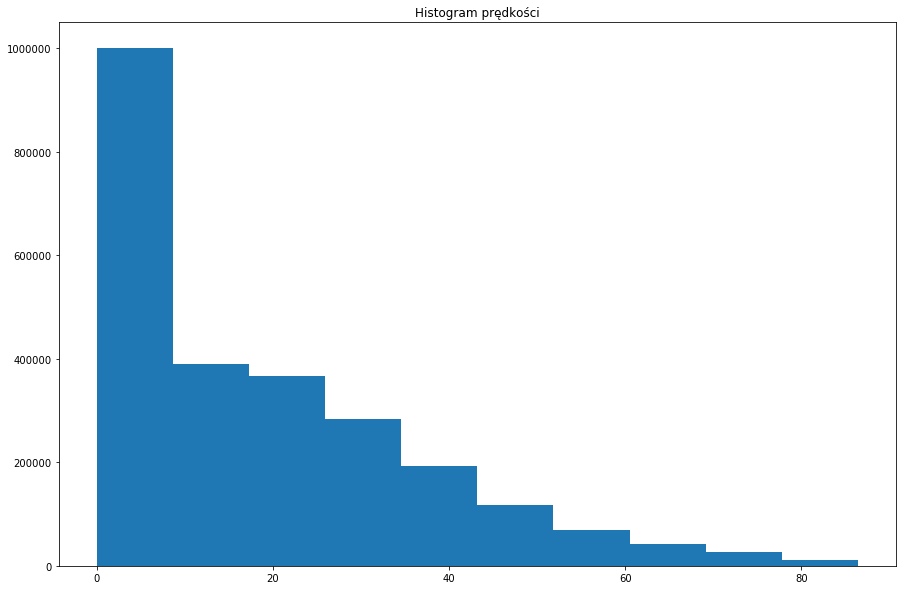

In [89]:
plt.hist(data['Velocity'] * 3.6)
plt.title("Histogram prędkości")

Interesujące może być również przyjrzenie się prędkościom różnym od 0. Częste postoje na przystankach mogą nieco zaburzać obraz.

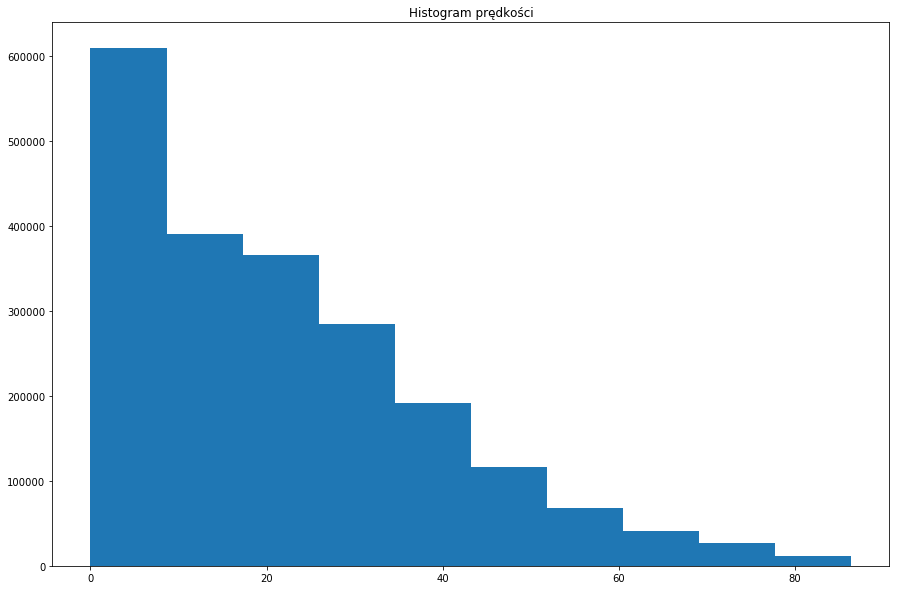

In [91]:
plt.hist(data[data['Velocity'] != 0]['Velocity'] * 3.6)
plt.title("Histogram prędkości")

W przypadku odrzucenia obserwacji stojących tramwajów niskie prędkości wciąż dominują, ale ich przewaga znacząco zmalała.

### Time

In [73]:
data['Day'] = data['Time'].map(lambda x: x.day)

In [74]:
data.groupby('Day').size()

Day
21    114619
22    342762
23    461439
24    497826
25    457770
26    478430
27    155214
dtype: int64

Pełne dane są dostępne tylko z okresu 23-26 maja.

In [75]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
dataOneDay = data[(data['Time'] > startTime) & (data['Time'] < endTime)]

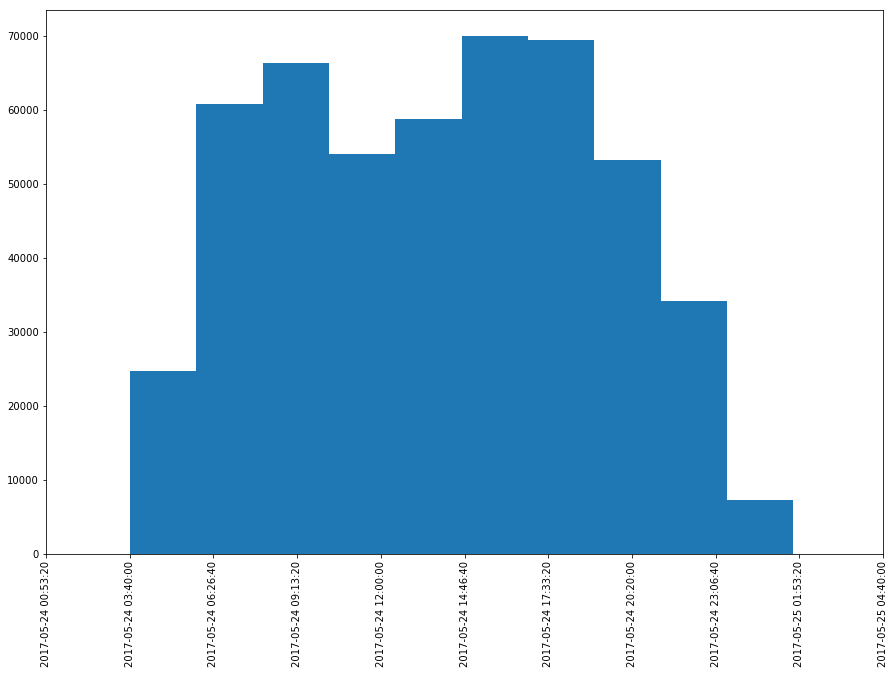

In [76]:
plt.hist([t.timestamp() for t in dataOneDay['Time']])
locs, labels = plt.xticks()
plt.xticks(locs,[datetime.datetime.fromtimestamp(t) for t in locs], rotation='vertical')
plt.show()

### LowFloor

In [77]:
dataRoundedTime = dataOneDay
dataRoundedTime['Time'] = [t - datetime.timedelta(seconds=t.second, microseconds=t.microsecond) for t in dataOneDay['Time']]

D:\Programy\Anaconda27\envs\py35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


([<matplotlib.axis.XTick at 0x1e514fdcfd0>,
 <a list of 8 Text xticklabel objects>)

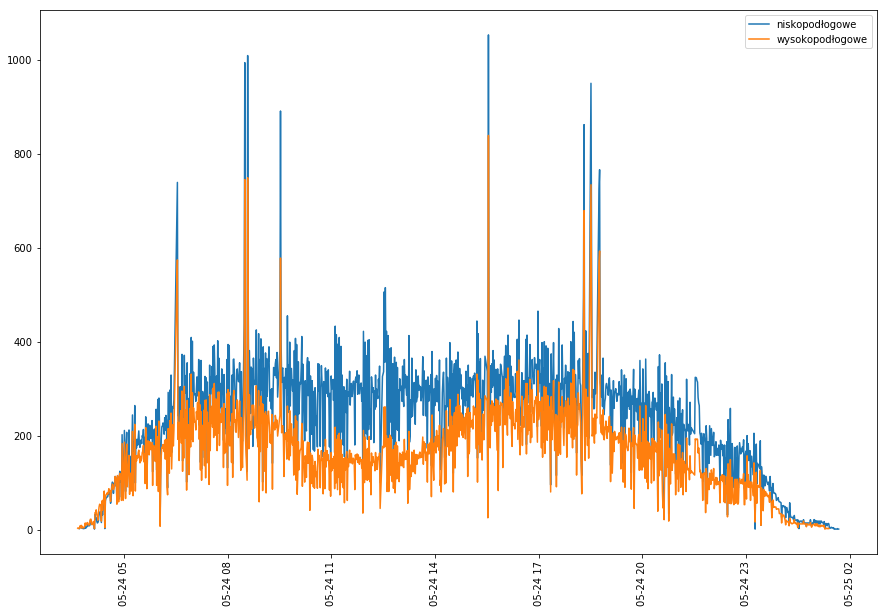

In [78]:
dataLowFloor = dataRoundedTime[dataRoundedTime['LowFloor']].groupby('Time').size()
fig, ax = plt.subplots()
ax.plot(dataLowFloor, label="niskopodłogowe")
dataHighFloor = dataRoundedTime[~dataRoundedTime['LowFloor']].groupby('Time').size()
ax.plot(dataHighFloor, label="wysokopodłogowe")
legend = ax.legend(loc='upper right')
locs, labels = plt.xticks()
plt.xticks(locs, rotation='vertical')

In [79]:
lowFloorByLine = data.groupby('FirstLine').LowFloor.agg(['sum', 'count'])
lowFloorByLine['LowFloorFraction'] = lowFloorByLine['sum'] / lowFloorByLine['count']
lowFloorByLine.sort_values('LowFloorFraction', ascending=False, inplace=True)
lowFloorByLine = lowFloorByLine.reset_index()

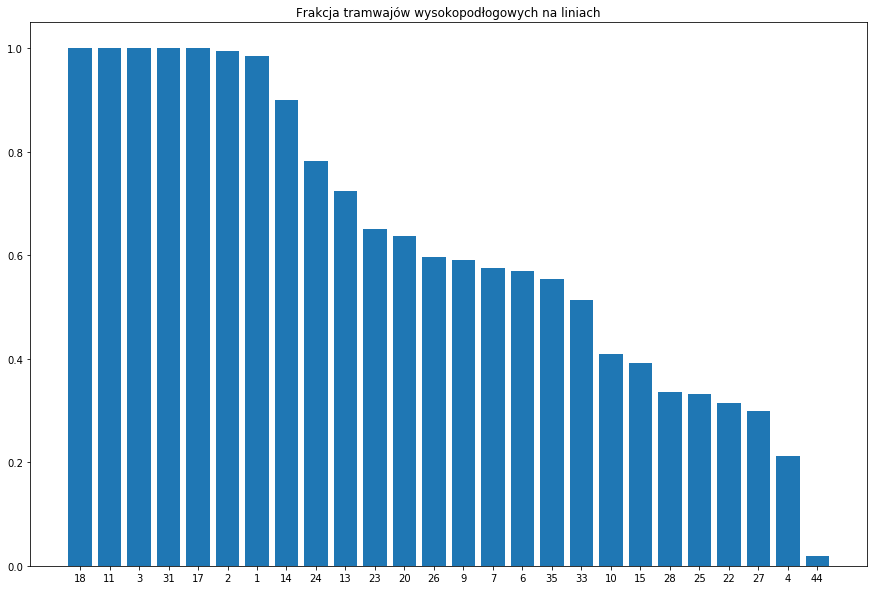

In [80]:
plt.bar(list(range(len(lowFloorByLine))), lowFloorByLine['LowFloorFraction'], tick_label=lowFloorByLine['FirstLine'])
plt.title("Frakcja tramwajów wysokopodłogowych na liniach")

Procentowo najwięcej wysokopodłogowych tramwajów kursuje na linii 44 - linii okresowej.

### Mapy

D:\Programy\Anaconda27\envs\py35\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
D:\Programy\Anaconda27\envs\py35\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


test: 0


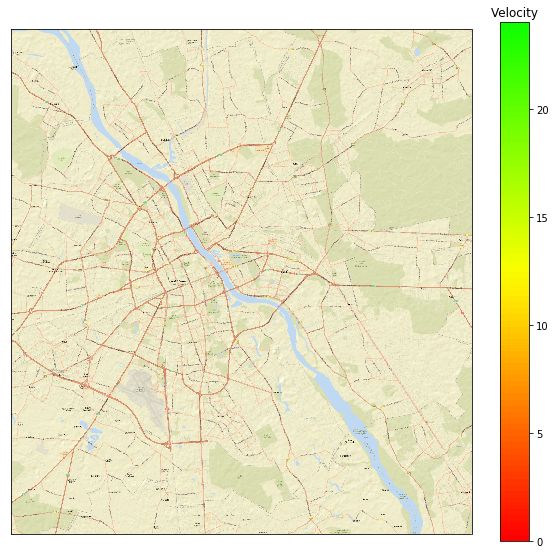

In [97]:
import Mapper.mapper as mp
data = data.dropna(how='all')
pm = mp.PlotMap(data, color_colname='Velocity')
pm.plot(list(range(100,130)))
pm.show()

In [98]:
data.head(130).tail(30)

,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade,TimeDiff,PrevLon,PrevLat,Velocity,Day
77,1,20.983589,1,2017-05-21 15:38:27,52.231319,True,15,NaT,NaN,NaN,0.0,21
2,4,21.022173,4,2017-05-21 15:38:27,52.207378,True,2,NaT,NaN,NaN,0.0,21
68,17,21.005352,17,2017-05-21 15:38:27,52.216412,True,32,NaT,NaN,NaN,0.0,21
175,14,21.017933,14,2017-05-21 15:38:27,52.219711,True,4,NaT,NaN,NaN,0.0,21
118,35,21.011974,35,2017-05-21 15:38:28,52.229557,True,2,NaT,NaN,NaN,0.0,21
156,2,20.945576,2,2017-05-21 15:38:28,52.322041,True,6,NaT,NaN,NaN,0.0,21
154,2,20.928530,2,2017-05-21 15:38:28,52.300049,True,5,NaT,NaN,NaN,0.0,21
126,7,20.982807,7,2017-05-21 15:38:28,52.218239,True,1,NaT,NaN,NaN,0.0,21
119,4,21.006453,4,2017-05-21 15:38:28,52.238605,True,1,NaT,NaN,NaN,0.0,21
148,31,21.020708,31,2017-05-21 15:38:28,52.189407,True,1,NaT,NaN,NaN,0.0,21
